In [2]:
%matplotlib inline

import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import statistics

# Read in RRI data and plot

In [3]:
data_json = json.load(open('labeled_data_RRI.json','r'))

print("{:<10} {:<10} {:<10} {:<10} {:<10}".format('collect #','condition','length','minimum','maximum'))
for k in data_json.keys():
    for l in data_json[k].keys():
        print("{:<10} {:<10} {:<10} {:<10} {:<10}".format(k,l,len(data_json[k][l]['data']),min(data_json[k][l]['data']),max(data_json[k][l]['data'])))

collect #  condition  length     minimum    maximum   
collect1   pre        298        601        888       
collect1   ex2        298        606        1009      
collect1   post       298        599        981       
collect1   ex1        298        626        969       
collect3   pre        298        606        943       
collect3   ex2        298        571        1039      
collect3   post       298        576        1010      
collect3   ex1        298        565        969       
collect2   pre        298        576        957       
collect2   ex2        298        546        998       
collect2   post       298        625        1114      
collect2   ex1        298        299        1150      
collect4   pre        298        587        838       
collect4   ex2        298        570        938       
collect4   post       298        610        953       
collect4   ex1        298        580        898       


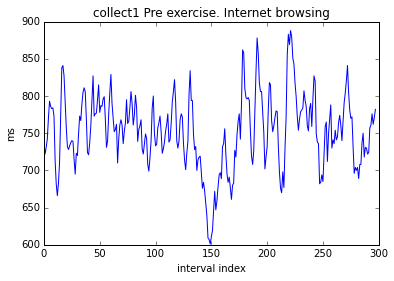

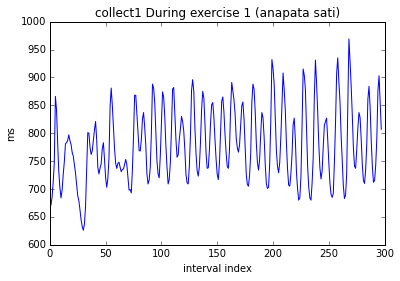

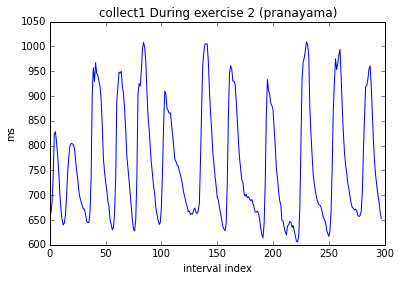

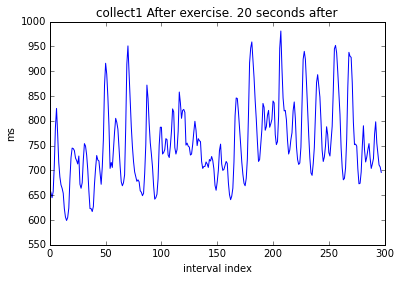

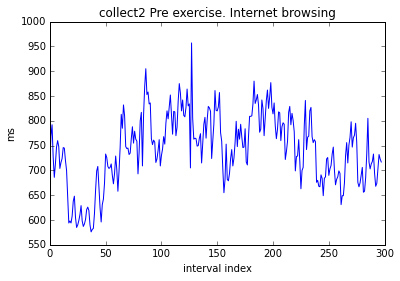

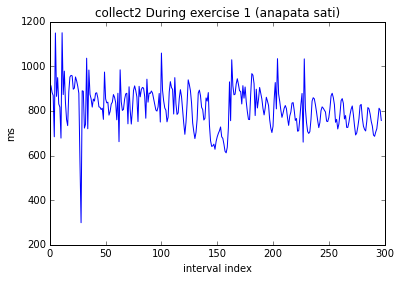

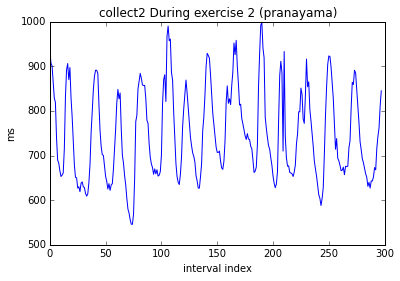

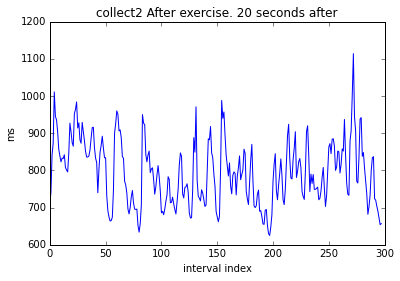

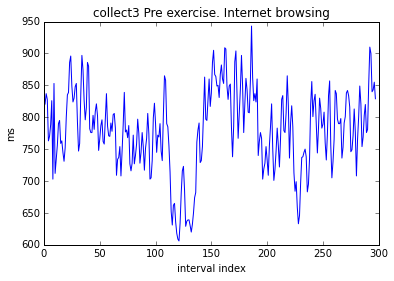

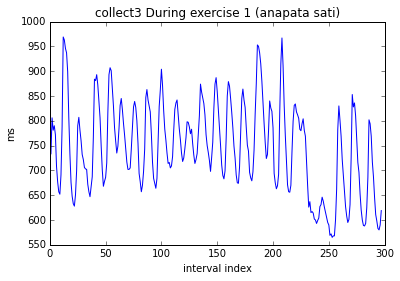

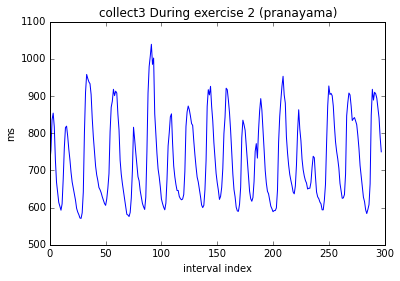

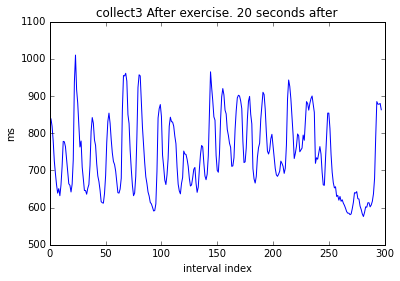

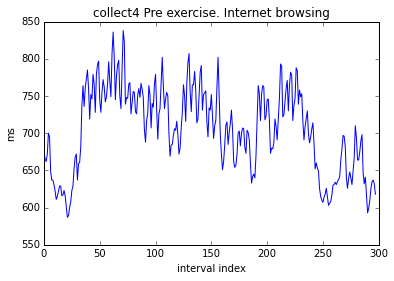

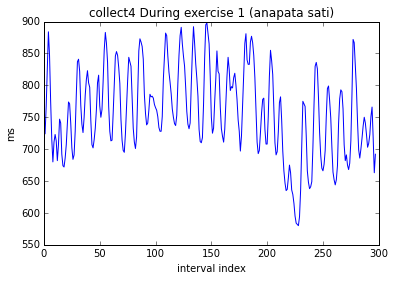

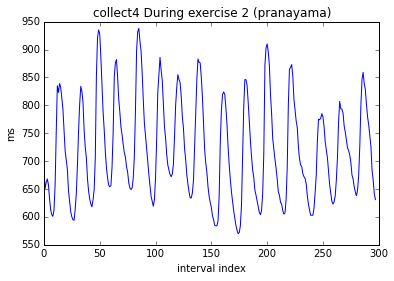

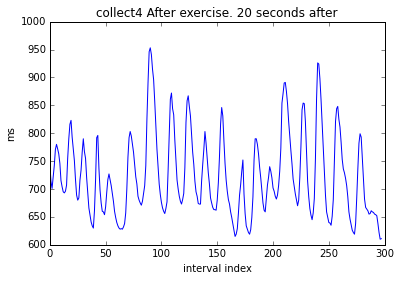

In [68]:
condition_keys = ['pre','ex1','ex2','post']
collection_keys = ["collect1","collect2","collect3","collect4"]

data_json = json.load(open('/Users/watson/data/TTC_2016/labeled_data_RRI.json','r'))
for k in collection_keys:
    for k2 in condition_keys:
        plt.figure()
        plt.plot(data_json[k][k2]['data'])
        plt.title("{} {}".format(k,data_json[k][k2]['description']))
        plt.xlabel('interval index')
        plt.ylabel('ms')

    
    #TODO: label axes

# Load into a Pandas Dataframe for convenient manipulation

In [69]:
#TODO: prep quick statement about Pandas (for finanicial analysis)

data_df = {}

for c in collection_keys:
    data_df[c] = pd.DataFrame({k:v['data'] for k,v in data_json[c].items()})
    print(data_df[c].head())

   ex1  ex2  post  pre
0  692  664   664  738
1  671  664   655  722
2  685  686   645  731
3  712  737   657  742
4  746  823   710  770
   ex1  ex2  post  pre
0  894  939   706  714
1  913  907   742  769
2  883  901   842  792
3  869  865   873  727
4  684  829  1011  686
   ex1  ex2  post  pre
0  868  720   831  817
1  733  755   839  821
2  806  836   819  837
3  781  854   780  828
4  790  817   726  763
   ex1  ex2  post  pre
0  728  681   746  676
1  724  651   714  665
2  767  662   701  662
3  828  668   721  672
4  884  658   742  700


# Plot running windowed STD of RRI

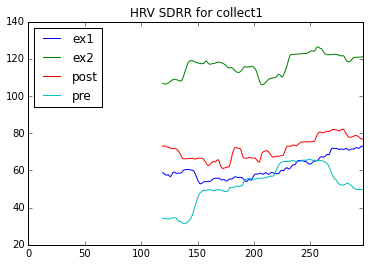

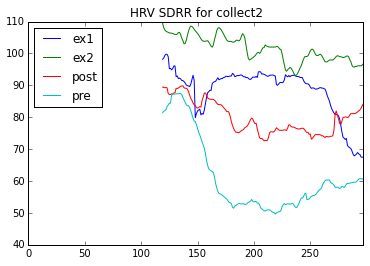

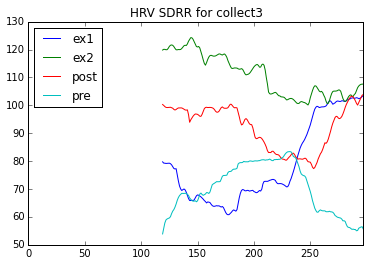

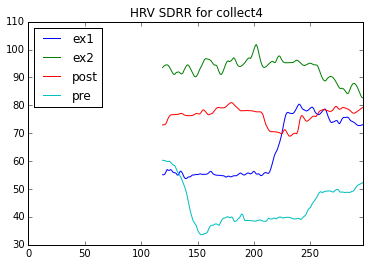

In [70]:
for c in collection_keys:
    pd.rolling_std(data_df[c],window=120).plot()
    plt.title("HRV SDRR for {}".format(c))

# Plot running windowed RMSSD (root mean square of successive differences)

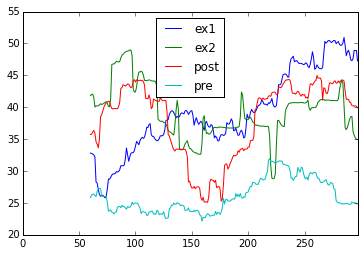

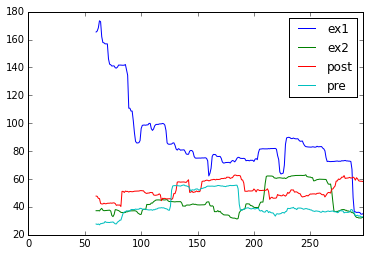

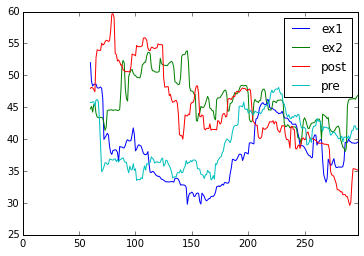

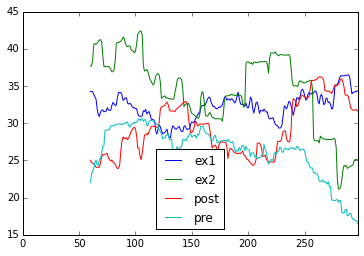

In [72]:
def root_mean_square(vals):
    return np.sqrt(np.mean(np.square(vals)))

for c in collection_keys:
    pd.rolling_apply(data_df[c] - data_df[c].shift(1),60,root_mean_square).plot()

# Plot Poincare Return Map of RRI

/Users/watson/code/python/packages/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


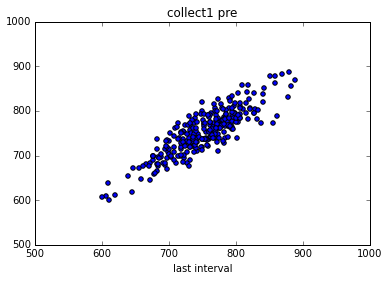

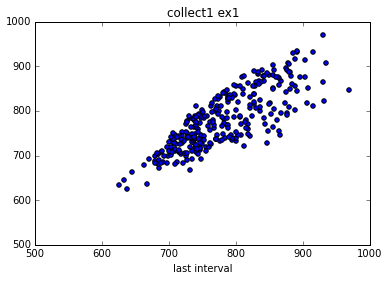

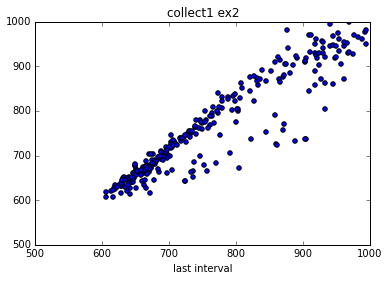

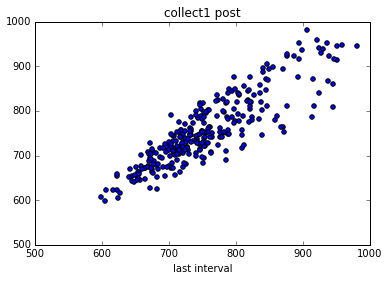

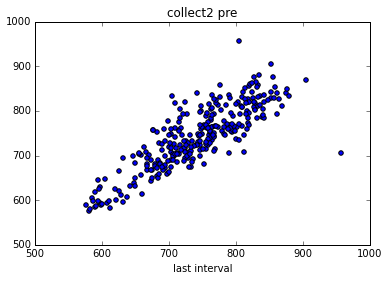

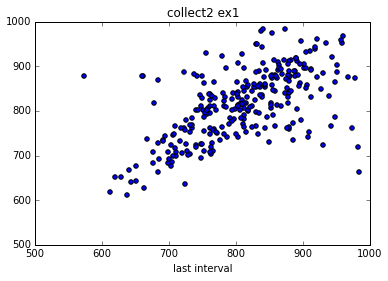

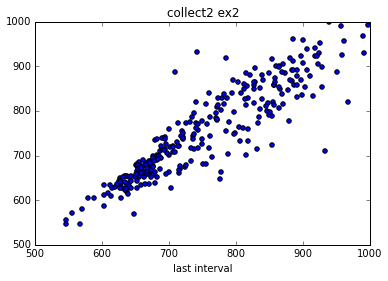

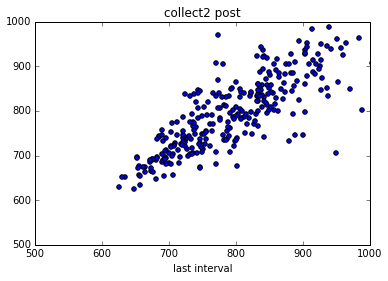

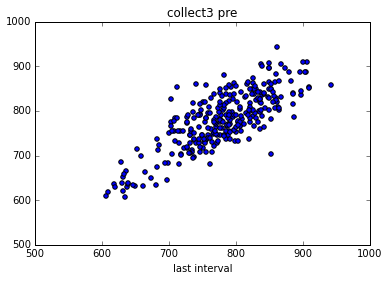

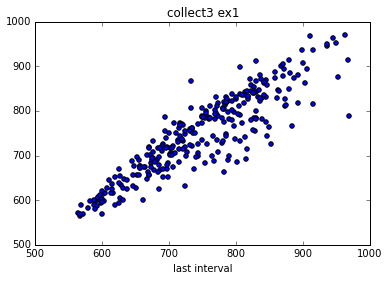

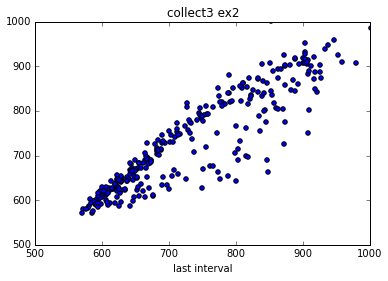

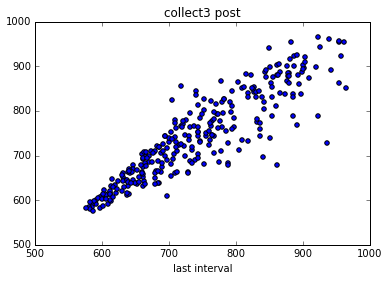

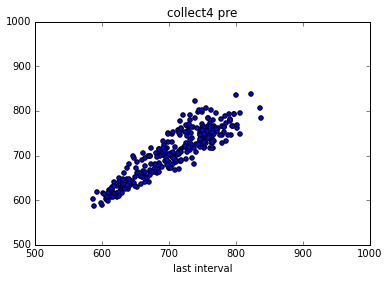

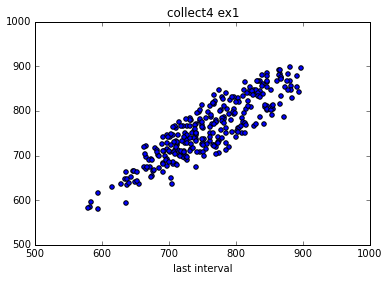

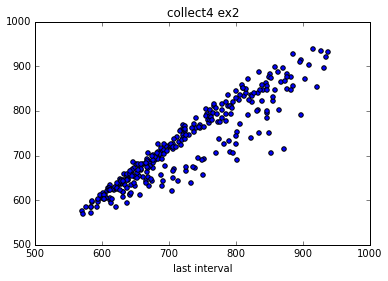

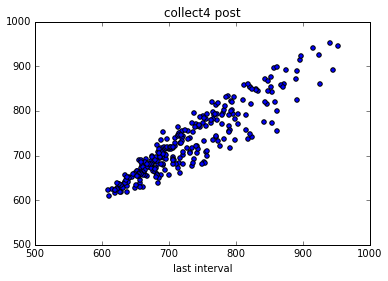

In [74]:
#sort keys / put in array manually
for c in collection_keys:
    for k in condition_keys:
        plt.figure()
        plt.scatter(data_df[c][k],data_df[c][k].shift(1))
        plt.xlim(500,1000)
        plt.ylim(500,1000)
        plt.xlabel('current interval')
        plt.xlabel('last interval')
        plt.title("{} {}".format(c,k))

# Things to do (student exercises)

## statistical tests (e.g. t-test)
## box plot
## categorization (use sci-kit learn)
## freq domain HRV 
## visualization 
    e.g.: extension of Poincare: current vs weighted average of previous several values
    e.g.2: visualize in freq domain PSD
## threshold crossing: play with when do you shift into another state